## Analysis of Knicks Second Round Series (Heat or Bucks)

Imports

In [190]:
import pandas as pd
import numpy as np
from nba_api.stats.static import teams, players
from nba_api.stats.endpoints import commonteamroster, teamdashptshots, leaguegamefinder, teamestimatedmetrics

Pulling basic info from NBA.com

In [161]:
# get_teams returns a list of 30 dictionaries, each an NBA team
nba_teams = teams.get_teams()

knicks_dict = [team for team in nba_teams if team['nickname'] == 'Knicks'][0]
heat_dict = [team for team in nba_teams if team['city'] == 'Miami'][0]
bucks_dict = [team for team in nba_teams if team['nickname'] == 'Bucks'][0]

In [170]:
knicks_roster = commonteamroster.CommonTeamRoster(knicks_dict['id'], season='2022-23')
heat_roster = commonteamroster.CommonTeamRoster(heat_dict['id'], season='2022-23')
bucks_roster = commonteamroster.CommonTeamRoster(bucks_dict['id'], season='2022-23')


knicks_roster = knicks_roster.get_data_frames()[0]
heat_roster = heat_roster.get_data_frames()[0]
bucks_roster = bucks_roster.get_data_frames()[0]

Get some basic stats for all three teams

In [210]:
knicks_regszn = leaguegamefinder.LeagueGameFinder(team_id_nullable= knicks_dict['id'], season_nullable= '2022-23', season_type_nullable= 'Regular Season').get_data_frames()[0]
knicks_playoffs = leaguegamefinder.LeagueGameFinder(team_id_nullable= knicks_dict['id'], season_nullable= '2022-23', season_type_nullable= 'Playoffs').get_data_frames()[0]

heat_regszn = leaguegamefinder.LeagueGameFinder(team_id_nullable= heat_dict['id'], season_nullable= '2022-23', season_type_nullable= 'Regular Season').get_data_frames()[0]
heat_playoffs = leaguegamefinder.LeagueGameFinder(team_id_nullable= heat_dict['id'], season_nullable= '2022-23', season_type_nullable= 'Playoffs').get_data_frames()[0]

In [193]:
regszn_estimate = teamestimatedmetrics.TeamEstimatedMetrics(season = '2022-23', season_type= 'Regular Season').get_data_frames()[0]
playoffs_estimate = teamestimatedmetrics.TeamEstimatedMetrics(season = '2022-23', season_type= 'Playoffs').get_data_frames()[0]

In [240]:
playoffs_estimate

,TEAM_NAME,TEAM_ID,GP,W,L,W_PCT,MIN,E_OFF_RATING,E_DEF_RATING,E_NET_RATING,E_PACE,E_AST_RATIO,E_OREB_PCT,E_DREB_PCT,E_REB_PCT,E_TM_TOV_PCT,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,E_OFF_RATING_RANK,E_DEF_RATING_RANK,E_NET_RATING_RANK,E_AST_RATIO_RANK,E_OREB_PCT_RANK,E_DREB_PCT_RANK,E_REB_PCT_RANK,E_TM_TOV_PCT_RANK,E_PACE_RANK
0,Sacramento Kings,1610612758,4,2,2,0.5,192.0,108.2,111.8,-3.6,105.8,14.9,0.277,0.753,0.504,0.122,13,8,6,8,13,10,9,10,15,3,7,8,3,1
1,Golden State Warriors,1610612744,4,2,2,0.5,192.0,111.8,108.2,3.6,105.8,19.0,0.247,0.723,0.496,0.145,13,8,6,8,13,8,7,6,2,10,14,9,14,1
2,Milwaukee Bucks,1610612749,5,1,4,0.2,245.0,111.8,116.7,-4.8,104.1,18.6,0.225,0.822,0.510,0.136,1,12,12,12,1,7,14,12,4,12,2,6,8,3
3,Miami Heat,1610612748,5,4,1,0.8,245.0,116.7,111.8,4.8,104.1,18.2,0.178,0.775,0.490,0.139,1,1,2,2,1,3,10,5,7,15,5,11,11,3
4,Atlanta Hawks,1610612737,5,2,3,0.4,240.0,109.5,117.0,-7.5,103.7,16.7,0.251,0.793,0.494,0.128,1,8,10,10,7,9,15,14,12,8,4,10,5,5
5,Boston Celtics,1610612738,5,3,2,0.6,240.0,117.0,109.5,7.5,103.7,19.9,0.207,0.749,0.506,0.137,1,6,6,6,7,2,8,3,1,13,9,7,9,5
6,Phoenix Suns,1610612756,5,4,1,0.8,240.0,120.9,112.9,8.1,101.6,19.0,0.273,0.732,0.517,0.121,1,1,2,2,7,1,12,2,3,4,12,4,1,7
7,LA Clippers,1610612746,5,1,4,0.2,240.0,112.9,120.9,-8.1,101.6,15.8,0.268,0.727,0.483,0.137,1,12,12,12,7,5,16,15,14,5,13,13,9,7
8,Memphis Grizzlies,1610612763,5,2,3,0.4,245.0,105.1,105.9,-0.8,101.3,17.1,0.258,0.741,0.488,0.124,1,8,10,10,1,13,5,9,10,7,11,12,4,9
9,Los Angeles Lakers,1610612747,5,3,2,0.6,245.0,105.9,105.1,0.8,101.3,16.3,0.259,0.742,0.513,0.141,1,6,6,6,1,12,4,8,13,6,10,5,12,9


In [206]:
knicks_heat_playoffs_e = playoffs_estimate.loc[playoffs_estimate['TEAM_NAME'].isin(['New York Knicks', 'Miami Heat'])]
knicks_heat_regszn_e = regszn_estimate.loc[regszn_estimate['TEAM_NAME'].isin(['New York Knicks', 'Miami Heat'])]

In [207]:
knicks_heat_regszn_e

,TEAM_NAME,TEAM_ID,GP,W,L,W_PCT,MIN,E_OFF_RATING,E_DEF_RATING,E_NET_RATING,E_PACE,E_AST_RATIO,E_OREB_PCT,E_DREB_PCT,E_REB_PCT,E_TM_TOV_PCT,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,E_OFF_RATING_RANK,E_DEF_RATING_RANK,E_NET_RATING_RANK,E_AST_RATIO_RANK,E_OREB_PCT_RANK,E_DREB_PCT_RANK,E_REB_PCT_RANK,E_TM_TOV_PCT_RANK,E_PACE_RANK
24,New York Knicks,1610612752,82,47,35,0.573,3991.0,114.9,111.8,3.1,99.7,16.6,0.283,0.771,0.526,0.129,1,8,8,8,2,5,18,7,29,2,9,2,5,25
28,Miami Heat,1610612748,82,44,38,0.537,3961.0,110.4,110.6,-0.2,98.6,17.8,0.228,0.777,0.492,0.136,1,11,11,11,18,25,9,21,21,21,5,22,13,29


In [209]:
knicks_heat_playoffs_e

,TEAM_NAME,TEAM_ID,GP,W,L,W_PCT,MIN,E_OFF_RATING,E_DEF_RATING,E_NET_RATING,E_PACE,E_AST_RATIO,E_OREB_PCT,E_DREB_PCT,E_REB_PCT,E_TM_TOV_PCT,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,E_OFF_RATING_RANK,E_DEF_RATING_RANK,E_NET_RATING_RANK,E_AST_RATIO_RANK,E_OREB_PCT_RANK,E_DREB_PCT_RANK,E_REB_PCT_RANK,E_TM_TOV_PCT_RANK,E_PACE_RANK
3,Miami Heat,1610612748,5,4,1,0.8,245.0,116.7,111.8,4.8,104.1,18.2,0.178,0.775,0.49,0.139,1,1,2,2,1,3,10,5,7,15,5,11,11,3
12,New York Knicks,1610612752,5,4,1,0.8,240.0,104.6,101.1,3.6,94.2,14.0,0.349,0.768,0.55,0.160,1,1,2,2,7,14,2,6,16,1,6,2,15,13


In [211]:
knicks_regszn

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22022,1610612752,NYK,New York Knicks,0022201220,2023-04-09,NYK vs. IND,L,241,136,52,108,0.481,15,40,0.375,17,22,0.773,19,34,53,29,8,8,15,24,-5.0
1,22022,1610612752,NYK,New York Knicks,0022201209,2023-04-07,NYK @ NOP,L,240,105,38,88,0.432,14,43,0.326,15,20,0.750,7,30,37,19,5,2,9,17,-8.0
2,22022,1610612752,NYK,New York Knicks,0022201190,2023-04-05,NYK @ IND,W,240,138,52,100,0.520,18,46,0.391,16,25,0.640,20,32,52,34,13,8,14,21,9.0
3,22022,1610612752,NYK,New York Knicks,0022201168,2023-04-02,NYK vs. WAS,W,240,118,46,88,0.523,13,32,0.406,13,18,0.722,7,32,39,31,12,4,11,17,9.0
4,22022,1610612752,NYK,New York Knicks,0022201154,2023-03-31,NYK @ CLE,W,240,130,49,93,0.527,17,36,0.472,15,24,0.625,16,32,48,24,6,5,7,12,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,22022,1610612752,NYK,New York Knicks,0022200075,2022-10-28,NYK @ MIL,L,240,108,37,93,0.398,12,35,0.343,22,32,0.688,13,41,54,19,6,5,12,19,-11.0
78,22022,1610612752,NYK,New York Knicks,0022200058,2022-10-26,NYK vs. CHA,W,266,134,52,97,0.536,11,30,0.367,19,22,0.864,12,34,46,26,5,11,16,24,3.0
79,22022,1610612752,NYK,New York Knicks,0022200046,2022-10-24,NYK vs. ORL,W,240,115,43,93,0.462,11,37,0.297,18,25,0.720,18,32,50,24,7,3,13,24,13.0
80,22022,1610612752,NYK,New York Knicks,0022200023,2022-10-21,NYK vs. DET,W,239,130,50,95,0.526,16,38,0.421,14,22,0.636,11,39,50,29,4,6,12,26,24.0


In [236]:
knicks_regszn_numeric = knicks_regszn.apply(pd.to_numeric, errors='coerce')
knicks_regszn_avg = pd.DataFrame(knicks_regszn_numeric.dropna(axis=1).mean(axis = 0)).T

heat_regszn_numeric = heat_regszn.apply(pd.to_numeric, errors='coerce')
heat_regszn_avg = pd.DataFrame(heat_regszn_numeric.dropna(axis=1).mean(axis = 0)).T

heat_regszn_avg

,SEASON_ID,TEAM_ID,GAME_ID,MIN,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22022.0,1.610613e+09,2.220061e+07,241.634146,109.47561,39.207317,85.256098,0.460451,11.95122,34.780488,0.344317,19.109756,22.987805,0.828183,9.707317,30.890244,40.597561,23.841463,7.987805,2.963415,12.768293,18.487805,-0.317073


In [239]:
knicks_regszn_avg

,SEASON_ID,TEAM_ID,GAME_ID,MIN,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22022.0,1.610613e+09,2.220061e+07,243.426829,116.02439,42.0,89.365854,0.471073,12.646341,35.731707,0.353841,19.378049,25.45122,0.758793,12.573171,34.02439,46.597561,22.926829,6.426829,4.146341,12.04878,20.317073,2.956098


# Other Stuff

In [64]:
knicks_playoffs_shooting = temp_knicks_playoffs_shooting.get_data_frames()[3]
knicks_playoffs_shooting

,TEAM_ID,TEAM_NAME,SORT_ORDER,G,CLOSE_DEF_DIST_RANGE,FGA_FREQUENCY,FGM,FGA,FG_PCT,EFG_PCT,FG2A_FREQUENCY,FG2M,FG2A,FG2_PCT,FG3A_FREQUENCY,FG3M,FG3A,FG3_PCT
0,1610612752,New York Knicks,1,2,0-2 Feet - Very Tight,0.060,7,10,0.700,0.700,0.060,7,10,0.700,0.000,0,0,NaN
1,1610612752,New York Knicks,2,2,2-4 Feet - Tight,0.413,35,69,0.507,0.522,0.377,33,63,0.524,0.036,2,6,0.333
2,1610612752,New York Knicks,3,2,4-6 Feet - Open,0.311,22,52,0.423,0.481,0.174,16,29,0.552,0.138,6,23,0.261
3,1610612752,New York Knicks,4,2,6+ Feet - Wide Open,0.216,13,36,0.361,0.500,0.018,3,3,1.000,0.198,10,33,0.303


In [65]:
from nba_api.stats.endpoints import teamdashlineups

knicks_lineups = teamdashlineups.TeamDashLineups(knicks['id'], opponent_team_id = cavs['id'])
knicks_cavs_lineups = knicks_lineups.get_data_frames()[1]
# knicks_cavs_lineups

### Shot Chart Stuff

In [114]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import gca
import matplotlib.font_manager as fm
from matplotlib.patches import Circle, Rectangle, Arc, ConnectionPatch
from nba_api.stats.endpoints import shotchartdetail

In [92]:
brunson = [player for player in nba_players if player['full_name'] == 'Jalen Brunson'][0]
brunson

{'id': 1628973,
 'full_name': 'Jalen Brunson',
 'first_name': 'Jalen',
 'last_name': 'Brunson',
 'is_active': True}

In [138]:
playoffs_shot_detail = shotchartdetail.ShotChartDetail(player_id= brunson['id'], 
              team_id=knicks['id'], context_measure_simple = 'FGA',     
              season_type_all_star='Playoffs', timeout = None)
playoffs_shot_df = playoffs_shot_detail.get_data_frames()[0] 

regszn_shot_detail = shotchartdetail.ShotChartDetail(player_id= brunson['id'], 
              team_id=knicks['id'], context_measure_simple = 'FGA', timeout = None)
regszn_shot_df = regszn_shot_detail.get_data_frames()[0]

brunson_playoff_shots = playoffs_shot_df
brunson_regszn_shots = regszn_shot_df

In [146]:
regszn_makes = brunson_regszn_shots.groupby('SHOT_MADE_FLAG').get_group(1)
regszn_misses = brunson_regszn_shots.groupby('SHOT_MADE_FLAG').get_group(0)

playoff_makes = brunson_playoff_shots.groupby('SHOT_MADE_FLAG').get_group(1)
playoff_misses = brunson_playoff_shots.groupby('SHOT_MADE_FLAG').get_group(0)

In [132]:
from matplotlib.patches import Circle, Rectangle, Arc
import matplotlib.pyplot as plt
from matplotlib.pyplot import gca

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

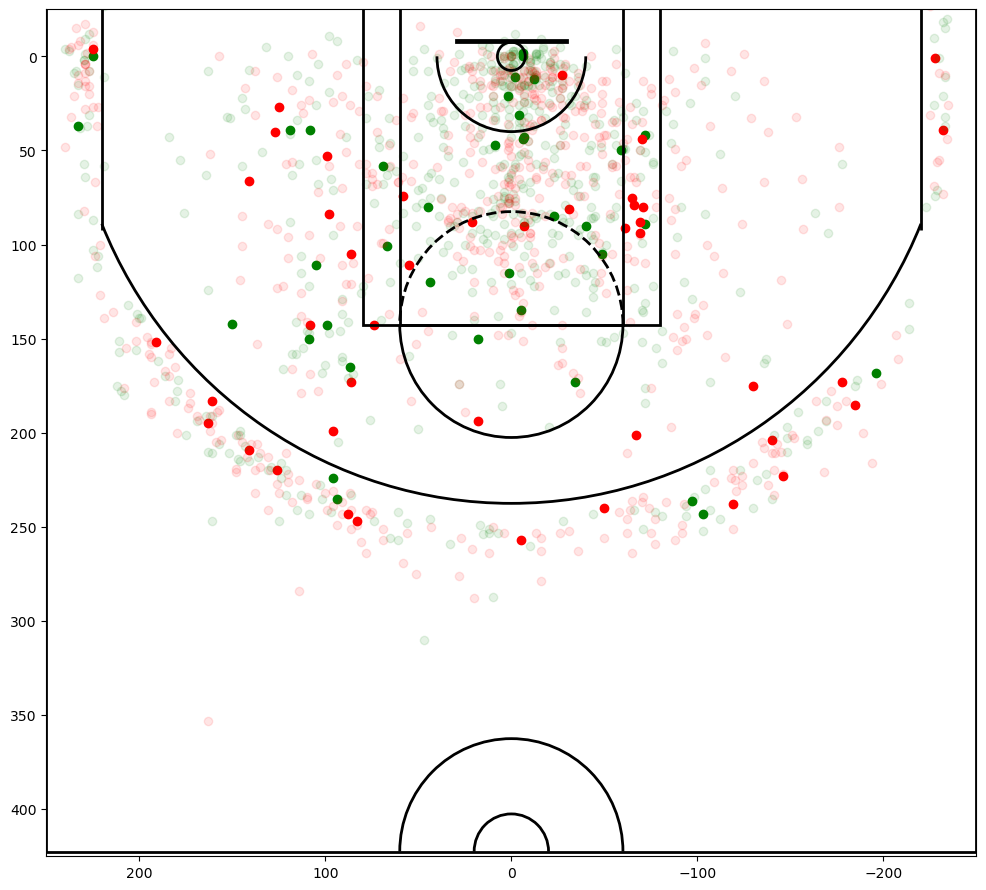

In [159]:
plt.figure(figsize=(12,11))
plt.scatter(playoff_makes.LOC_X, playoff_makes.LOC_Y, color = 'green')
plt.scatter(playoff_misses.LOC_X, playoff_misses.LOC_Y, color ='red')
plt.scatter(regszn_makes.LOC_X, regszn_makes.LOC_Y, color = 'green', alpha= 0.1)
plt.scatter(regszn_misses.LOC_X, regszn_misses.LOC_Y, color ='red', alpha= 0.1)
draw_court(outer_lines=True)
# Descending values along the axis from left to right
plt.xlim(250,-250)
plt.ylim(425, -25)
plt.show()